<a href="https://colab.research.google.com/github/841532/google_colab/blob/main/lab2_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2

## Задание
Решите пожалуйста следующую задачу.

Используйте классификатор SVM для данных находящихся пo
[ссылке](https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view?usp=share_link) (данный датасет применялся в лабораторной работе №1). Здесь - выходящей меткой (учителем) является столбец / атрибут - `outcome`. Предоставьте результаты, используя следующие ядерные функции:
- Линейное ядро
- Полиномиальное ядро
- Гауссово ядро
- Сигмоидное ядро

**Укажите `score` моделей.**

## Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! gdown --fuzzy 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view?usp=share_link'

Downloading...
From: https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec
To: /content/diabetes.csv
100% 23.1k/23.1k [00:00<00:00, 60.9MB/s]


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##  О датасете
[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data)

Этот набор данных взят из Национального института диабета, заболеваний органов пищеварения и почек (NIDDK). Целью набора данных является диагностическое предсказание наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года, родом из индейцев Пима.

Наборы данных состоят из нескольких переменных медицинских предикторов и одной целевой переменной `Outcome`. Переменные-предикторы включают количество беременностей, которые были у пациентки, её индекс массы тела `BMI`, уровень инсулина, возраст и так далее. Всего в датасете 9 переменных:
- `Pregnancies` - количество беременностей;
- `Glucose` - концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе;
- `BloodPressure` - диастолическое артериальное давление (мм рт. ст.);
- `SkinThickness` - толщина кожной складки трицепса (мм);
- `Insulin` - 2-часовой сывороточный инсулин (мкЕд/мл);
- `BMI` - Индекс массы тела (вес в кг/(рост в м)^2);
- `DiabetesPedigreeFunction` - функция оценки вероятности диабета на основе семейного анамнеза;
- `Age` - возраст (лет);
- `Outcome` - целевая переменная (0 или 1) 268 из 768 — 1 (больны), остальные — 0 (здоровы).



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Классификатор SVM

--- Отчет о классификации (SVM) ---
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Общая точность (Accuracy): 0.73


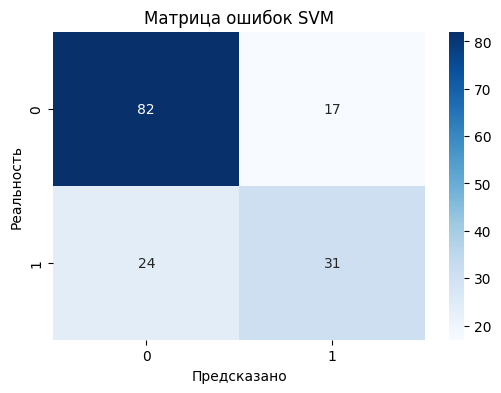

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# подготовка данных
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# создание и обучение модели svm
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# предсказание и оценка
predictions = svm_model.predict(X_test_scaled)

print("--- Отчет о классификации (SVM) ---")
print(classification_report(y_test, predictions))
print(f"Общая точность (Accuracy): {accuracy_score(y_test, predictions):.2f}")

# визуализация матрицы ошибок
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок SVM')
plt.xlabel('Предсказано')
plt.ylabel('Реальность')
plt.show()

### Масштабирование данных

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

#  признаки для масштабирования все, кроме outcome
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# инициализация масштабировщика
scaler = StandardScaler()

# обучение и трансформирование данных
# результатом будет массив numpy
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)
print("Данные после масштабирования (первые 5 строк):")
display(X_scaled.head())

# проверка: теперь среднее почти 0, а стандартное отклонение 1
print("\nСтатистика после масштабирования:")
display(X_scaled.describe().round(2).T[['mean', 'std']])

Данные после масштабирования (первые 5 строк):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496



Статистика после масштабирования:


,mean,std
Pregnancies,-0.0,1.0
Glucose,-0.0,1.0
BloodPressure,0.0,1.0
SkinThickness,0.0,1.0
Insulin,-0.0,1.0
BMI,0.0,1.0
DiabetesPedigreeFunction,0.0,1.0
Age,0.0,1.0


### Линейное ядро

Точность (Accuracy) с линейным ядром: 0.76

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



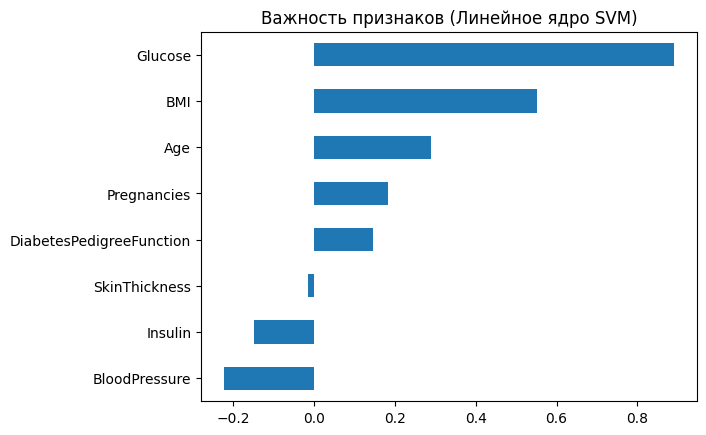

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Подготовка данных
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Масштабирование (обязательно для линейного SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Создание и обучение модели с линейным ядром
# kernel='linear' заставляет модель искать разделяющую прямую (гиперплоскость)
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train_scaled, y_train)

# 5. Предсказание
y_pred = linear_svm.predict(X_test_scaled)

# 6. Оценка результатов
print(f"Точность (Accuracy) с линейным ядром: {accuracy_score(y_test, y_pred):.2f}")
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

# 7. БОНУС: Посмотрим на важность признаков
# У линейного ядра есть атрибут coef_, который показывает веса признаков
import pandas as pd
import matplotlib.pyplot as plt

weights = pd.Series(linear_svm.coef_[0], index=X.columns)
weights.sort_values().plot(kind='barh', title='Важность признаков (Линейное ядро SVM)')
plt.show()

### Полиномиальное ядро

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# подготовка данных
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# масштабирование (чтобы избежать роста значений)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# обучение модели с полиномиальным ядром
# degree=3 - третья степень (кубическая зависимость)
# coef0=1 - добавляет константу, что помогает модели лучше обучаться при высоких степенях
poly_svm = SVC(kernel='poly', degree=3, coef0=1, C=1.0, random_state=42)
poly_svm.fit(X_train_scaled, y_train)

# предсказание и оценка
y_pred = poly_svm.predict(X_test_scaled)

print(f"Точность (Accuracy) с полиномиальным ядром (степень 3): {accuracy_score(y_test, y_pred):.2f}")
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

Точность (Accuracy) с полиномиальным ядром (степень 3): 0.76

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



### Гауссово ядро

Точность (Accuracy) с Гауссовым ядром (RBF): 0.73

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



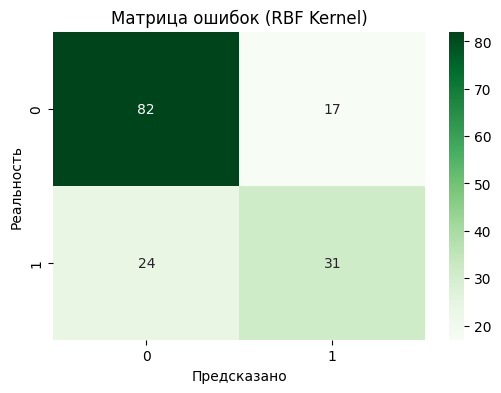

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# подготовка признаков и целевой переменной
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# разделение на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# создание и обучение модели с ядром RBF
# C - штраф за ошибки (регуляризация)
# gamma - определяет радиус влияния каждой точки
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
rbf_svm.fit(X_train_scaled, y_train)

# прогноз и оценка
y_pred = rbf_svm.predict(X_test_scaled)

print(f"Точность (Accuracy) с Гауссовым ядром (RBF): {accuracy_score(y_test, y_pred):.2f}")
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

# визуализация матрицы ошибок
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Матрица ошибок (RBF Kernel)')
plt.xlabel('Предсказано')
plt.ylabel('Реальность')
plt.show()

### Сигмоидное ядро

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# подготовка данных
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# обучение модели с сигмоидным ядром
# gamma='scale' и C=1.0 — стандартные параметры для начала
sigmoid_svm = SVC(kernel='sigmoid', C=1.0, gamma='scale', random_state=42)
sigmoid_svm.fit(X_train_scaled, y_train)

# предсказание и оценка
y_pred = sigmoid_svm.predict(X_test_scaled)

print(f"Точность (Accuracy) с сигмоидным ядром: {accuracy_score(y_test, y_pred):.2f}")
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

Точность (Accuracy) с сигмоидным ядром: 0.64

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        99
           1       0.50      0.53      0.51        55

    accuracy                           0.64       154
   macro avg       0.61      0.62      0.62       154
weighted avg       0.65      0.64      0.64       154

